In [133]:
# Add your code here...
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [134]:
wine = pd.read_csv("assets/wine.csv", sep=',')

In [135]:
wine.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [136]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
index,6497.0,2042.535632,1436.926393,0.00000,812.00000,1649.00000,3273.00000,4897.00000
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000


<AxesSubplot:>

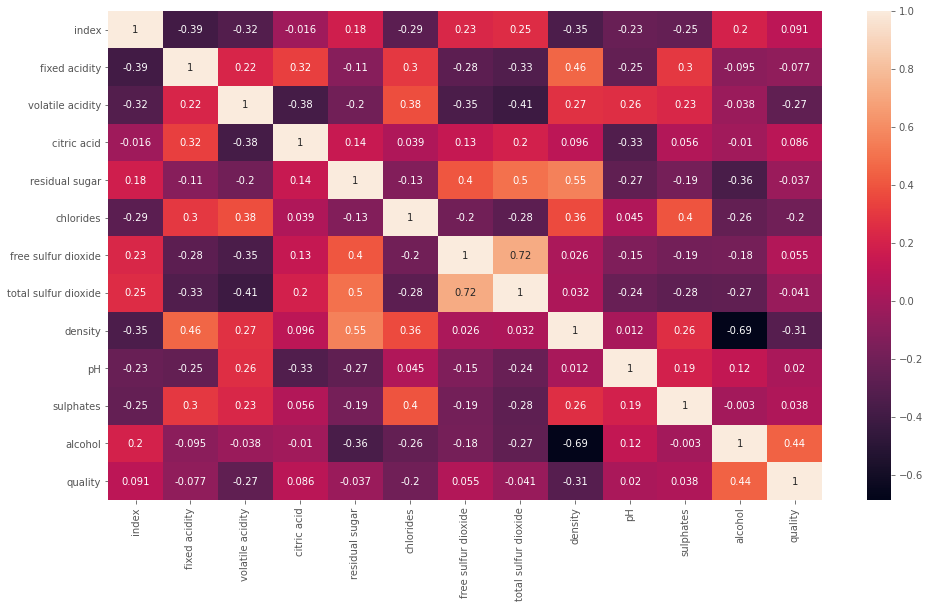

In [137]:
sns.heatmap(wine.corr(), annot=True)

In [138]:
wine.isnull().sum()

index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [139]:
from scipy import stats

In [140]:
#z = np.abs(stats.zscore(wine))
#print(z)

In [141]:
#threshold = 3
#print(np.where(z > 3))

In [142]:
#df_wine = wine[(z < 3).all(axis=1)]

In [143]:
#df_wine.shape

In [144]:
wine = wine.drop_duplicates()

## Convert 'quality' scale to 1 good or 0 bad

In [145]:
good = [7,8,9]
bad = [3,4,5,6]
wine.quality = wine.quality.replace(to_replace=bad, value=0)
wine.quality = wine.quality.replace(to_replace=good, value=1)

df_good_wine = wine[wine['quality'] == 1]

In [146]:
for i in range(5):
    wine = wine.append(df_good_wine)

In [147]:
wine.quality.value_counts()

1    7662
0    5220
Name: quality, dtype: int64

In [148]:
x = wine.drop(columns= 'quality')
y = wine['quality'].values

In [149]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [150]:
print(y_train)
print(y_test)

[1 1 1 ... 1 0 0]
[1 1 0 ... 1 1 0]


In [151]:
# Default params:
#clf = RandomForestClassifier(n_estimators=600)

# Best params:
clf = RandomForestClassifier(n_estimators=90, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=12, bootstrap=True, random_state=100)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, max_features='sqrt', n_estimators=90,
                       random_state=100)

In [152]:
y_pred = clf.predict(X_test)

In [153]:
print("Accuracy is: ", accuracy_score(y_test, y_pred))

Accuracy is:  0.9398525417151726


In [154]:
feature_imp = pd.Series(clf.feature_importances_, index=wine.columns[:12]).sort_values(ascending=False)
feature_imp

alcohol                 0.233355
density                 0.104623
volatile acidity        0.095208
chlorides               0.079401
citric acid             0.071786
index                   0.069683
residual sugar          0.065230
total sulfur dioxide    0.063677
sulphates               0.056137
free sulfur dioxide     0.055594
pH                      0.054179
fixed acidity           0.051127
dtype: float64

No handles with labels found to put in legend.


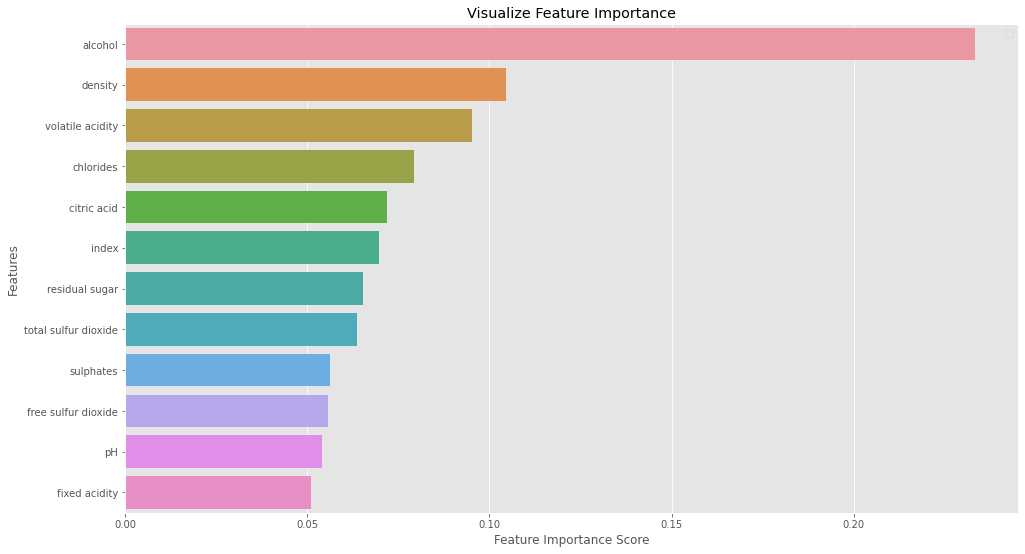

In [155]:
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualize Feature Importance")
plt.legend()
plt.show()

In [156]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1028
           1       0.91      1.00      0.95      1549

    accuracy                           0.94      2577
   macro avg       0.95      0.92      0.94      2577
weighted avg       0.95      0.94      0.94      2577



In [157]:
print(confusion_matrix(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred)

[[ 873  155]
 [   0 1549]]


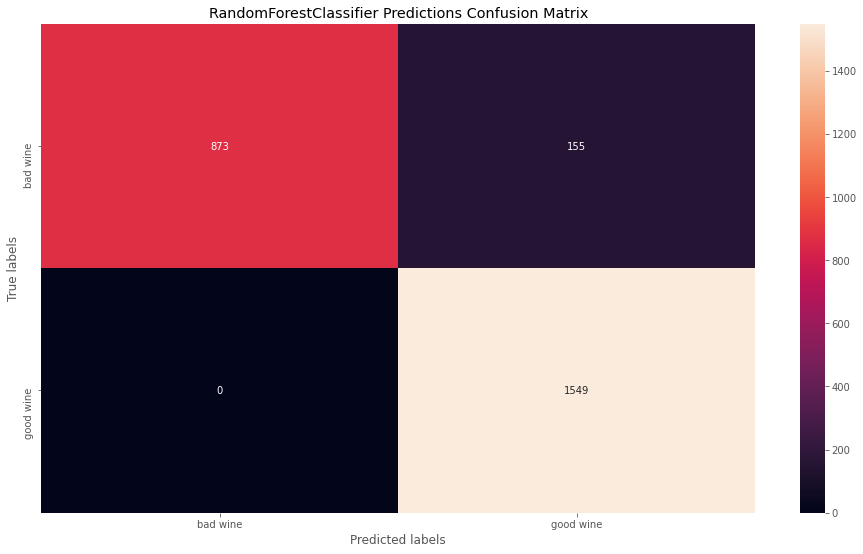

In [158]:
import seaborn as sns
  

ax= plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('RandomForestClassifier Predictions Confusion Matrix'); 
ax.xaxis.set_ticklabels(['bad wine', 'good wine']); ax.yaxis.set_ticklabels(['bad wine', 'good wine'])
plt.show()

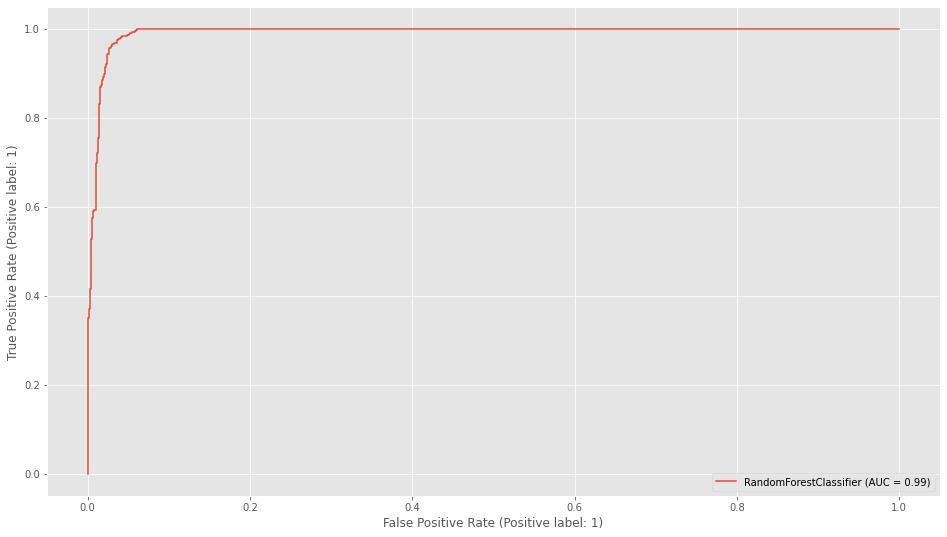

In [159]:
plot_roc_curve(clf, X_test, y_test) 
plt.show()

In [160]:
roc_scores = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

In [162]:
roc_scores2 = roc_auc_score(y_test, clf.predict(X_test))

In [163]:
roc_scores2

0.9246108949416342

In [164]:
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

In [165]:
cv_scores

array([0.927705  , 0.93789423, 0.9272198 , 0.92333819, 0.9272198 ])

In [166]:
print("%0.2f cv score with a standard deviation of %0.2f" % (cv_scores.mean(), cv_scores.std()))

0.93 cv score with a standard deviation of 0.00
